## Exploratory Data Analysis with Python

In [109]:
# Import the packages we will need
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from scipy import stats

### Create a Correlation Matrix

In [67]:
# Set path and name of file
filename=".\data\\auto.csv"
# Use pandas to import the file 
df = pd.read_csv(filename)
#print(df.dtypes)

In [68]:
# Find correlation between all columns
# Note: the default value of numeric_only used to be True, but now it is false, so you have to set it to True
df.corr(numeric_only=True)
# Find correlation between just a few columns
df[['bore','stroke','compression-ratio','horsepower']].corr(numeric_only=True)

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


## Plotting linear relationships


,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


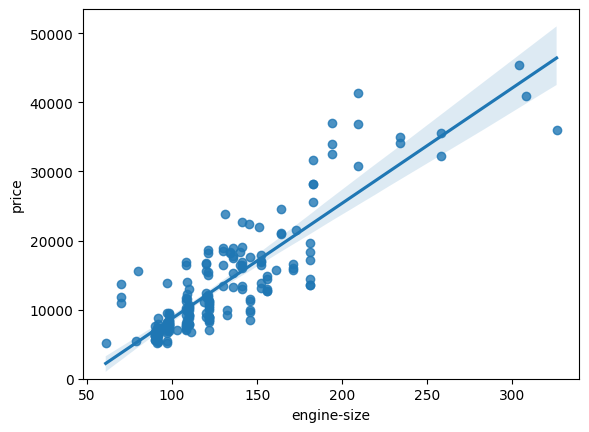

In [69]:
# Create a scatter plot
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.pyplot.ylim(0,)
df[["engine-size", "price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


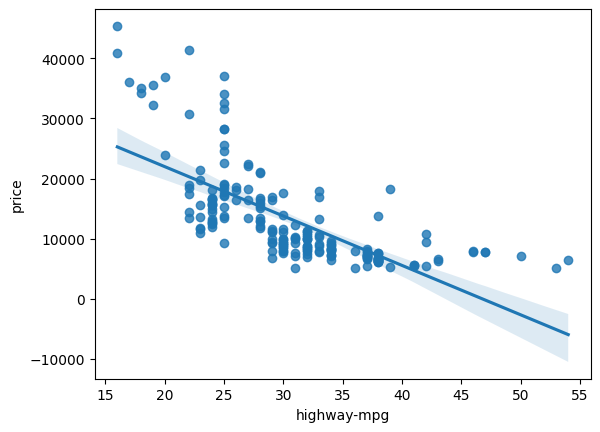

In [70]:
# Another scatterplot with highway-mpg and price
sns.regplot(x="highway-mpg", y="price", data=df)
df[['highway-mpg', 'price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


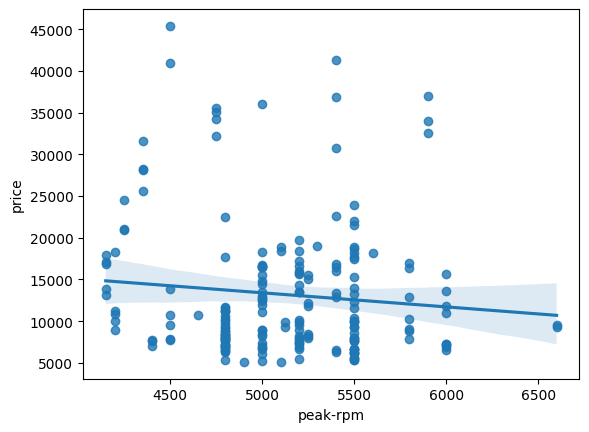

In [71]:
# Scatterplot showing a weak linear relationship
sns.regplot(x="peak-rpm", y="price", data=df)
df[['peak-rpm','price']].corr()


## Categorical Variables

<Axes: xlabel='body-style', ylabel='price'>

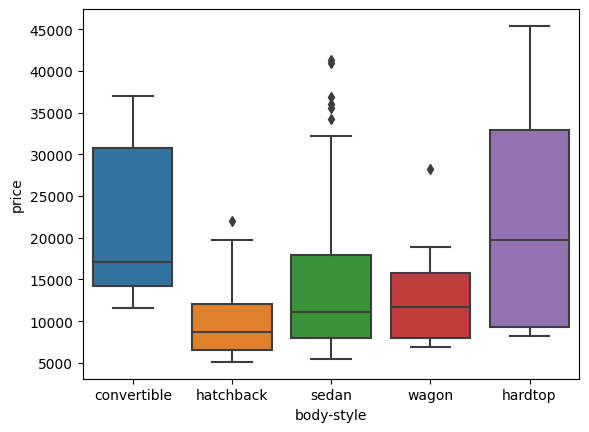

In [72]:
# Create a boxplot of body style and price
sns.boxplot(x="body-style", y="price", data=df)

We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price":

<Axes: xlabel='engine-location', ylabel='price'>

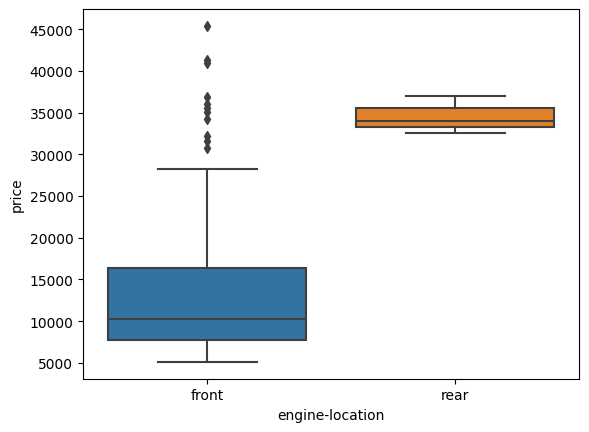

In [73]:
#
sns.boxplot(x="engine-location", y="price", data=df)

Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

In [74]:
# Describe is an easy way to get basic statistical facts from a data frame
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [75]:
# object types are excluded, but you can see them like this, or with include="all"
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


# Value counts
df['drive-wheels'].value_counts()

In [76]:
# Value counts can show you how many of a certain value there are.  Convert to frame
df['drive-wheels'].value_counts()
df['drive-wheels'].value_counts().to_frame()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [89]:
# Create new df, rename columns and index
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)

count    int64
dtype: object


In [100]:
# create a df of just drive wheels, body style, and price, then group by price and calculate the average
df_group_one = df[['drive-wheels','body-style','price']]
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean(numeric_only=True)
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [104]:
# group by multiple columns and make a pivot table
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
# fill missing values with zero
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                             
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333  \
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

## Create a heat map

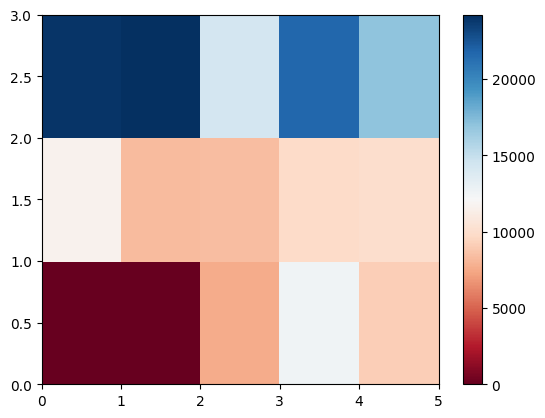

In [106]:
# create a heat map
plt.pyplot.pcolor(grouped_pivot, cmap='RdBu')
plt.pyplot.colorbar()
plt.pyplot.show()

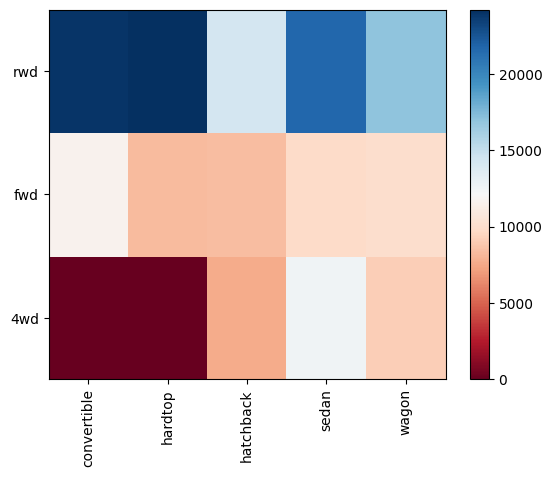

In [108]:
# label axes and re-arrange some things
fig, ax = plt.pyplot.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.pyplot.xticks(rotation=90)

fig.colorbar(im)
plt.pyplot.show()

In [ ]:
## P-value

What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the

p-value is  
<
  0.001: we say there is strong evidence that the correlation is significant.
the p-value is  
<
  0.05: there is moderate evidence that the correlation is significant.
the p-value is  
<
  0.1: there is weak evidence that the correlation is significant.
the p-value is  
>
  0.1: there is no evidence that the correlation is significant.


In [110]:
# calculate pearson coefficient and p-value of wheel-base and price
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270732947e-20


Conclusion:
Since the p-value is  
<
  0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).

# ANOVA - analysis of variance
F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

P-value: P-value tells how statistically significant our calculated score value is.

If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.

In [111]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
# use the get_group method to get prices for group of drive wheels
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577149576e-23


This is a great result with a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance.